In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

#### Reading data

In [51]:
train=pd.read_csv("train.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [52]:
x=train.iloc[:,:-1].values
y=train.iloc[:,-1].values
#print(x)
x.shape

(8523, 11)

#### Checking the null values

In [53]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
train.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [6]:
train["Item_Weight"].value_counts().head()

12.15    86
17.60    82
13.65    77
11.80    76
15.10    68
Name: Item_Weight, dtype: int64

In [7]:
train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [8]:
train["Outlet_Size"].value_counts().index[0]

'Medium'

#### Replacing the null values

In [9]:
train["Outlet_Size"].fillna("Medium", inplace = True)

In [10]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
train["Item_Weight"].mean()

12.857645184136183

In [12]:
train["Item_Weight"].fillna(train["Item_Weight"].mean(), inplace = True)

In [13]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Finding the skewness to check whether the curve follows a normal distribution

In [15]:
train.skew()

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

#### Dropping the columns

In [16]:
train= train.drop("Item_Identifier",axis=1) 
train= train.drop("Outlet_Identifier",axis =1)

In [17]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [18]:
train.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#### Selecting the columns excluding the datatype object

In [55]:
numeric = train.select_dtypes(exclude=["object"])
numeric.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


#### Checking the correlation between the columns

In [56]:
correlation = numeric.corr()
correlation["Item_Outlet_Sales"].sort_values(ascending =False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

#### Scatter plot 

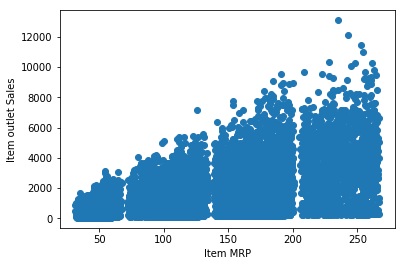

In [24]:
plt.scatter(x = numeric["Item_MRP"],y =numeric["Item_Outlet_Sales"])
plt.xlabel("Item MRP")
plt.ylabel("Item outlet Sales")
plt.show()

#### Plots

{'whiskers': [<matplotlib.lines.Line2D at 0x1ea8e201518>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea8e201ba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea8e201128>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea8e201eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea8e20c5c0>],
 'means': []}

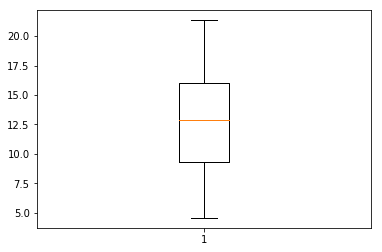

In [26]:
plt.boxplot(numeric["Item_Weight"])


{'whiskers': [<matplotlib.lines.Line2D at 0x1ea902dde80>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea902e87f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea902ddd30>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea902e8e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea902e8e48>],
 'means': []}

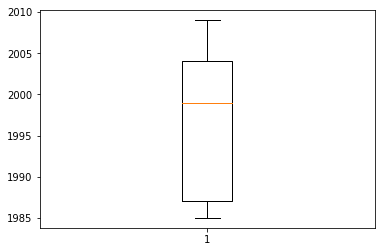

In [27]:
plt.boxplot(numeric["Outlet_Establishment_Year"])

In [28]:
x=train.iloc[:,:-1]
y=train['Item_Outlet_Sales']
x.shape

(8523, 9)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ea8e0b0908>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea8e0b0f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea8e0b0518>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea8e0a5668>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea8e0a59b0>],
 'means': []}

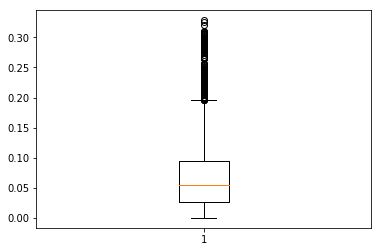

In [29]:
plt.boxplot(numeric["Item_Visibility"])

Skew is:  1.1775306028542798


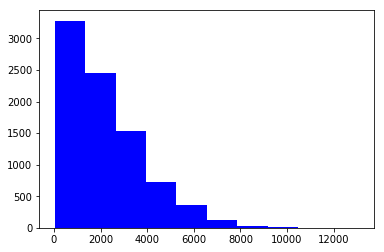

In [30]:
print("Skew is: ",numeric.Item_Outlet_Sales.skew())
plt.hist(numeric.Item_Outlet_Sales,color = "blue")
plt.show()

Skew is:  -0.887753343209305


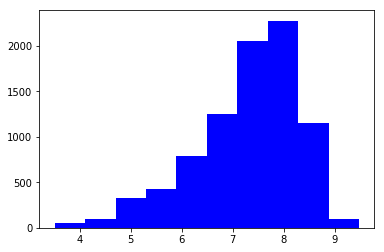

In [31]:
target = np.log(numeric.Item_Outlet_Sales)
print("Skew is: ",target.skew())
plt.hist(target,color = "blue")
plt.show()

Skew is:  0.23467599347099247


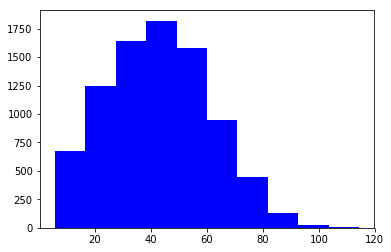

In [32]:
target = np.sqrt(numeric.Item_Outlet_Sales)
print("Skew is: ",target.skew())
plt.hist(target,color = "blue")
plt.show()

In [33]:
target.head()

0    61.115775
1    21.057607
2    45.795961
3    27.062520
4    31.538947
Name: Item_Outlet_Sales, dtype: float64

In [34]:
catego = train.select_dtypes(include=["object"])
catego_copy =catego.copy()

In [35]:
catego.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,Medium,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1


#### Encoding the data

In [36]:
catego = pd.get_dummies(catego)
catego.head()

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [37]:
new_train= pd.concat([numeric,catego],axis =1)
new_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


#### Dividing the dataset into x and y, independent and the dependent variable

In [39]:
y = new_train["Item_Outlet_Sales"]
x = new_train.drop(["Item_Outlet_Sales"],axis = 1)

In [41]:
x.shape

(8523, 35)

#### Dividing the dataset into train and test

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

#### Applying Regression

In [43]:
model = LinearRegression() # Creating an object of the type LinearRegression
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
print("a1=",model.coef_)
print("a2=",model.intercept_)

a1= [-1.54052934e+00 -3.69238527e+02  1.55423421e+01  4.43782520e+01
 -3.33882375e+01 -1.53943746e+00  3.93799046e+01  1.23513102e+02
 -1.27965332e+02  1.74669401e+01 -4.46646726e+01  1.73097636e+01
  3.36105096e+01 -1.02000476e+02 -4.97370039e+01  6.84067851e+00
  4.62418036e-01 -3.11185844e+01 -4.72456513e+01 -3.02034153e+00
 -2.16620670e+01  1.95181390e+02 -8.42612893e+00 -5.87999967e+01
  9.58032229e+01  6.20552940e+02 -3.44137243e+02 -2.76415697e+02
  2.44683978e+02 -5.92316137e+00 -2.38760816e+02 -1.60452300e+03
 -1.94063085e+02 -4.94779011e+02  2.29336510e+03]
a2= -88235.14879649803


In [46]:
y_pred = model.predict(x_test)
#print(y_test)
#print(y_pred)

In [57]:
model.score(x_train,y_train)*100

56.36978756287814

#### Computing the RMSE value

In [90]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE= ",rmse)

RMSE=  1133.0927339289224


In [58]:
model.score(x_test,y_test)*100

56.13389831769945

#### Prediction for test data

In [60]:
test=pd.read_csv("Test.csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [64]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [73]:
test["Item_Weight"].value_counts().head()

12.695633    976
10.500000     57
17.600000     53
15.600000     48
20.250000     47
Name: Item_Weight, dtype: int64

In [68]:
test["Item_Weight"].fillna(test["Item_Weight"].mean(), inplace = True)

In [74]:
test["Outlet_Size"].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [76]:
test["Outlet_Size"].fillna("Medium", inplace = True)

In [77]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [79]:
test= test.drop("Item_Identifier",axis=1) 
test= test.drop("Outlet_Identifier",axis =1)

In [80]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [82]:
categorical = test.select_dtypes(include=["object"])
categorical_copy =categorical.copy()

In [83]:
categorical.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Snack Foods,Medium,Tier 1,Supermarket Type1
1,reg,Dairy,Medium,Tier 2,Supermarket Type1
2,Low Fat,Others,Medium,Tier 3,Grocery Store
3,Low Fat,Snack Foods,Medium,Tier 2,Supermarket Type1
4,Regular,Dairy,Medium,Tier 3,Supermarket Type3


In [84]:
categorical = pd.get_dummies(categorical)
categorical.head()

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1


In [85]:
numerical_test = test.select_dtypes(exclude=["object"])
numerical_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.750000,0.007565,107.8622,1999
1,8.300000,0.038428,87.3198,2007
2,14.600000,0.099575,241.7538,1998
3,7.315000,0.015388,155.0340,2007
4,12.695633,0.118599,234.2300,1985


In [86]:
new_test= pd.concat([numerical_test,categorical],axis =1)
new_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0.007565,107.8622,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,2007,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,14.600000,0.099575,241.7538,1998,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,7.315000,0.015388,155.0340,2007,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,12.695633,0.118599,234.2300,1985,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [88]:
submission=model.predict(new_test)

In [89]:
pd.DataFrame(submission)

,0
0,1815.167113
1,1388.092581
2,1920.137850
3,2670.554494
4,5080.661320
5,1990.758289
6,618.344598
7,2816.540358
8,1529.757545
9,3197.228523
